In [158]:
%matplotlib inline

In [207]:
from datetime import datetime
import matplotlib.pyplot as plt
import os

import pandas as pd

In [160]:
DATA_DIR = os.path.join('..', 'data')

CSV_FILE_PATH = os.path.join(DATA_DIR, 'atlantic.csv')

In [161]:
df = pd.read_csv(CSV_FILE_PATH)

In [162]:
df.columns

Index(['ID', 'Name', 'Date', 'Time', 'Event', 'Status', 'Latitude',
       'Longitude', 'Maximum Wind', 'Minimum Pressure', 'Low Wind NE',
       'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE',
       'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW',
       'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW'],
      dtype='object')

In [163]:
def get_hurricane_category(wind):
    if wind < 74:
        return 0
    if wind < 96:
        return 1
    if wind < 111:
        return 2
    if wind < 130:
        return 3
    if wind < 157:
        return 4
    
    return 5

get_hurricane_category(100)

2

In [164]:
def year_from_date_str(date_int):
    date_str = str(date_int)
    return int(date_str[0:4])

year_from_date_str(18510625)

1851

In [165]:
def get_decade_from_year(year):
    year_string = str(year)
    century = year_string[0:2]
    
    decade = year_string[2:3]
    
    return int('{}{}0'.format(century, decade))

get_decade_from_year(1927)

1920

In [166]:
df['year'] = df.Date.apply(year_from_date_str)

In [167]:
df['decade'] = df.year.apply(get_decade_from_year)

In [168]:
df['wind']=df['Maximum Wind']

In [169]:
df['category'] = df.wind.apply(get_hurricane_category)

In [170]:
df = df[df['wind'] >= 0]

In [219]:
df['pressure'] = df['Minimum Pressure']

Text(0.5, 1.0, 'Frequency of Hurricanes by year')

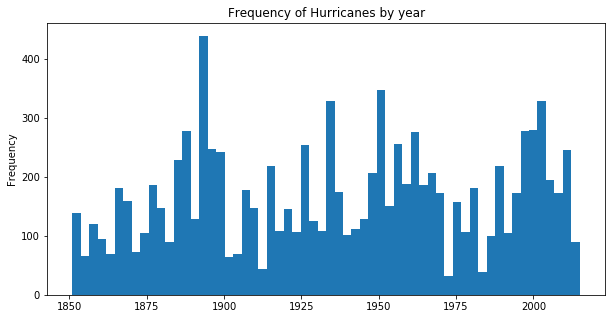

In [228]:
df[df['category'] > 0].year.plot.hist(bins=60, figsize=(10, 5))
plt.title('Frequency of Hurricanes by year')

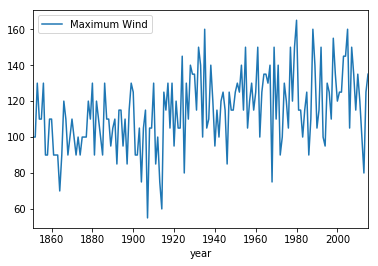

In [172]:
df.groupby('year')['Maximum Wind'].max().reset_index().plot.line(x='year', y='Maximum Wind')

Text(0.5, 1.0, 'Number of category 5 hurricanes by year')

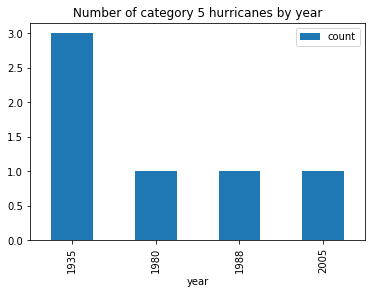

In [239]:
df[df['category'] == 5].groupby('year')[['year']].count().rename({'year': 'count'}, axis='columns') \
.plot.bar()

plt.title('Number of category 5 hurricanes by year')

Text(0.5, 1.0, 'Frequency of strong hurricanes by category and decade')

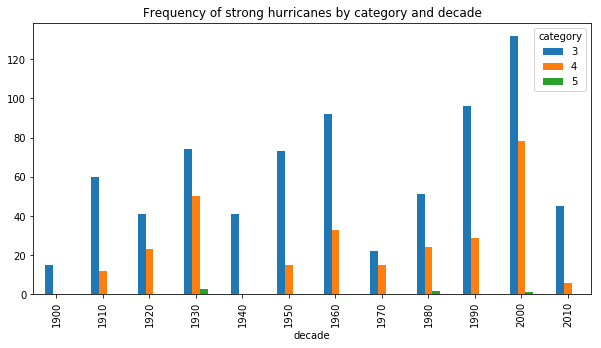

In [230]:
wind_category_df = df[df['category'] > 2].groupby(['decade', 'category'])[['wind']].count()
wind_category_df.rename({'wind': 'count'}, axis='columns', inplace=True)
wind_category_df.query('decade >= 1900').unstack()['count'].plot.bar(figsize=(10, 5))
plt.title('Frequency of strong hurricanes by category and decade')

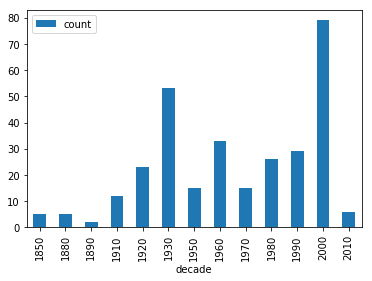

In [175]:
df[df['category'] > 3].groupby('decade').category.count().reset_index() \
.rename({'category': 'count'}, axis='columns').plot.bar(x='decade', y='count')

Text(0.5, 1.0, 'Scatter plot of pressure versus wind')

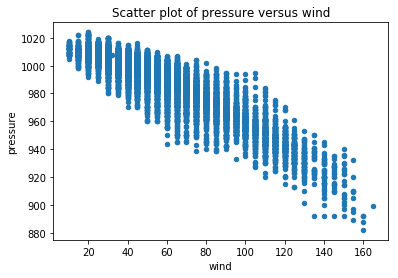

In [227]:
df[df['pressure'] > 0].plot.scatter(x='wind', y='pressure')
plt.title('Scatter plot of pressure versus wind')

In [178]:
# df['Maximum Wind'].plot.hist()

In [179]:
type(df.Date[0])

numpy.int64